## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [1]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [13]:
df_happ = pd.read_csv(HAPPINESS_DATASET, delimiter=",")
df_happ.head(), df_happ.shape

(       country  happiness_score  social_support  healthy_life_expectancy  \
 0  Afghanistan           2.5669        0.470367                52.590000   
 1      Albania           4.8827        0.671070                68.708138   
 2      Algeria           5.0051        0.803385                65.905174   
 3    Argentina           5.9747        0.900568                68.803802   
 4      Armenia           4.6768        0.757479                66.750656   
 
    freedom_of_choices  generosity  perception_of_corruption  \
 0            0.396573   -0.096429                  0.933687   
 1            0.781994   -0.042309                  0.896304   
 2            0.466611   -0.121105                  0.735485   
 3            0.831132   -0.194914                  0.842010   
 4            0.712018   -0.138780                  0.773545   
 
                          world_region  
 0                          South Asia  
 1          Central and Eastern Europe  
 2        Middle East and N

In [6]:
df_countries = pd.read_csv(COUNTRIES_DATASET, delimiter=",")
df_countries.head(), df_countries.shape

(  country_name     area  population literacy
 0  afghanistan   647500    31056997     36,0
 1      albania    28748     3581655     86,5
 2      algeria  2381740    32930091     70,0
 3    argentina  2766890    39921833     97,1
 4      armenia    29800     2976372     98,6,
 (135, 4))

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [14]:
# make the countries in lower case in df_happ

df_happ['country'] = df_happ['country'].apply(lambda x:x.lower()) # other: df_happ['country'].str.lower()
df_happ.head()


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [44]:
country_features = df_happ.merge(df_countries, how='left', left_on='country', right_on='country_name')
country_features = country_features.drop('country_name', axis=1)
country_features.head(), country_features.shape


(       country  happiness_score  social_support  healthy_life_expectancy  \
 0  afghanistan           2.5669        0.470367                52.590000   
 1      albania           4.8827        0.671070                68.708138   
 2      algeria           5.0051        0.803385                65.905174   
 3    argentina           5.9747        0.900568                68.803802   
 4      armenia           4.6768        0.757479                66.750656   
 
    freedom_of_choices  generosity  perception_of_corruption  \
 0            0.396573   -0.096429                  0.933687   
 1            0.781994   -0.042309                  0.896304   
 2            0.466611   -0.121105                  0.735485   
 3            0.831132   -0.194914                  0.842010   
 4            0.712018   -0.138780                  0.773545   
 
                          world_region     area  population literacy  
 0                          South Asia   647500    31056997     36,0  
 1      

## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [23]:
score_happ = country_features.sort_values(by=['happiness_score'], ascending=False).reset_index(drop=True)
score_happ.head(10)


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,"100,0"
1,denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,"100,0"
2,switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,41290,7523934,"99,0"
3,iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,103000,299388,"99,9"
4,norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,"100,0"
5,netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe,41526,16491461,"99,0"
6,sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe,449964,9016596,"99,0"
7,new zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ,268680,4076140,"99,0"
8,austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,83870,8192880,"98,0"
9,luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,2586,474413,"100,0"


In [73]:
country_features[country_features["country"]=="benin"]

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
12,benin,5.216,0.468671,54.312466,0.735183,-0.003537,0.740533,Sub-Saharan Africa,112620.0,7862944.0,40.9,69.818363


In [74]:
country_features["happiness_score"].mean()

5.525062216659259

We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [33]:
grouped_region = country_features.groupby("world_region").agg(
    happiness_score=('happiness_score', 'mean'),
    number_of_countries=('country', 'count'),
    countries=('country', lambda x: list(x))
)
grouped_region = grouped_region.sort_values(by=['happiness_score'], ascending=False)
grouped_region


,happiness_score,number_of_countries,countries
world_region,,,
North America and ANZ,7.173525,4,"[new zealand, canada, australia, united states]"
Western Europe,6.967405,20,"[finland, denmark, switzerland, iceland, norwa..."
Latin America and Caribbean,5.971280,20,"[costa rica, mexico, uruguay, guatemala, brazi..."
Central and Eastern Europe,5.891393,14,"[czech republic, slovenia, slovakia, lithuania..."
Southeast Asia,5.517788,8,"[singapore, philippines, thailand, malaysia, v..."
East Asia,5.483633,3,"[japan, mongolia, china]"
Commonwealth of Independent States,5.358342,12,"[uzbekistan, kazakhstan, moldova, tajikistan, ..."
Middle East and North Africa,5.269306,16,"[israel, united arab emirates, saudi arabia, b..."
Sub-Saharan Africa,4.393856,32,"[mauritius, benin, ghana, cameroon, senegal, g..."


The first region has only a few countries! What are them and what is their score?

In [37]:
grouped_region.head(1)

,happiness_score,number_of_countries,countries
world_region,,,
North America and ANZ,7.173525,4,"[new zealand, canada, australia, united states]"


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [53]:
country_features["literacy"] = country_features["literacy"].apply(lambda x: float(str(x).replace(',', '.')))
literacy = country_features[country_features["literacy"] == float(100)].sort_values(by=['happiness_score'], ascending=False)
literacy


,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
38,finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,100.0
31,denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,100.0
92,norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,100.0
72,luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,2586,474413,100.0
5,australia,7.2228,0.944855,73.604538,0.915432,0.190460,0.415169,North America and ANZ,7686850,20264082,100.0


In [54]:
formatted = (
    literacy['world_region'] + 
    ' - ' + 
    literacy['country'] + 
    ' (' + 
    literacy['happiness_score'].astype(str) + 
    ')'
)
formatted

38             Western Europe - finland (7.808700085)
31             Western Europe - denmark (7.645599842)
92        Western Europe - norway (7.487999916000001)
72          Western Europe - luxembourg (7.237500191)
5     North America and ANZ - australia (7.222799778)
dtype: object

What is the global average?

In [55]:
country_features["literacy"].mean()

81.85112781954888

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [61]:
low_literacy = country_features[country_features["literacy"] <= float(50)]
proportion = (low_literacy.shape[0] / country_features.shape[0]) * 100
print(f'{round(proportion,2)} %')

11.85 %


Print the raw number and the percentage of world population that is illiterate.

In [62]:
raw_number = low_literacy["population"].sum()
raw_number

580572946

In [65]:
percentage = (raw_number / country_features["population"].sum()) * 100
round(percentage,2)

9.45

## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [66]:
country_features["population"] = country_features["population"].apply(lambda x: float(x))

country_features["area"] = country_features["area"].apply(lambda x: float(x))


In [68]:
country_features["population_density"] = country_features["population"] / country_features["area"]
country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500.0,31056997.0,36.0,47.964474
1,albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748.0,3581655.0,86.5,124.587971
2,algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740.0,32930091.0,70.0,13.826065
3,argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890.0,39921833.0,97.1,14.428413
4,armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800.0,2976372.0,98.6,99.878255
...,...,...,...,...,...,...,...,...,...,...,...,...
130,venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050.0,25730435.0,93.4,28.211650
131,vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560.0,84402966.0,90.3,256.108041
132,yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970.0,21456188.0,50.2,40.639029
133,zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614.0,11502010.0,80.6,15.282748


What is the happiness score of the 3 countries with the lowest population density?

In [72]:
low_density = country_features.sort_values(by=['population_density'], ascending=True)
low_density[["happiness_score", "population_density"]][:3]

,happiness_score,population_density
83,5.4562,1.810751
5,7.2228,2.636201
14,3.4789,2.731371


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

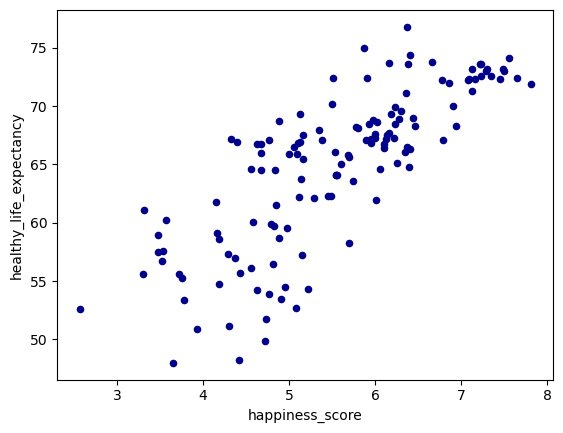

In [76]:
ax1 = country_features.plot.scatter(x='happiness_score',
                      y='healthy_life_expectancy',
                      c='DarkBlue')

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.